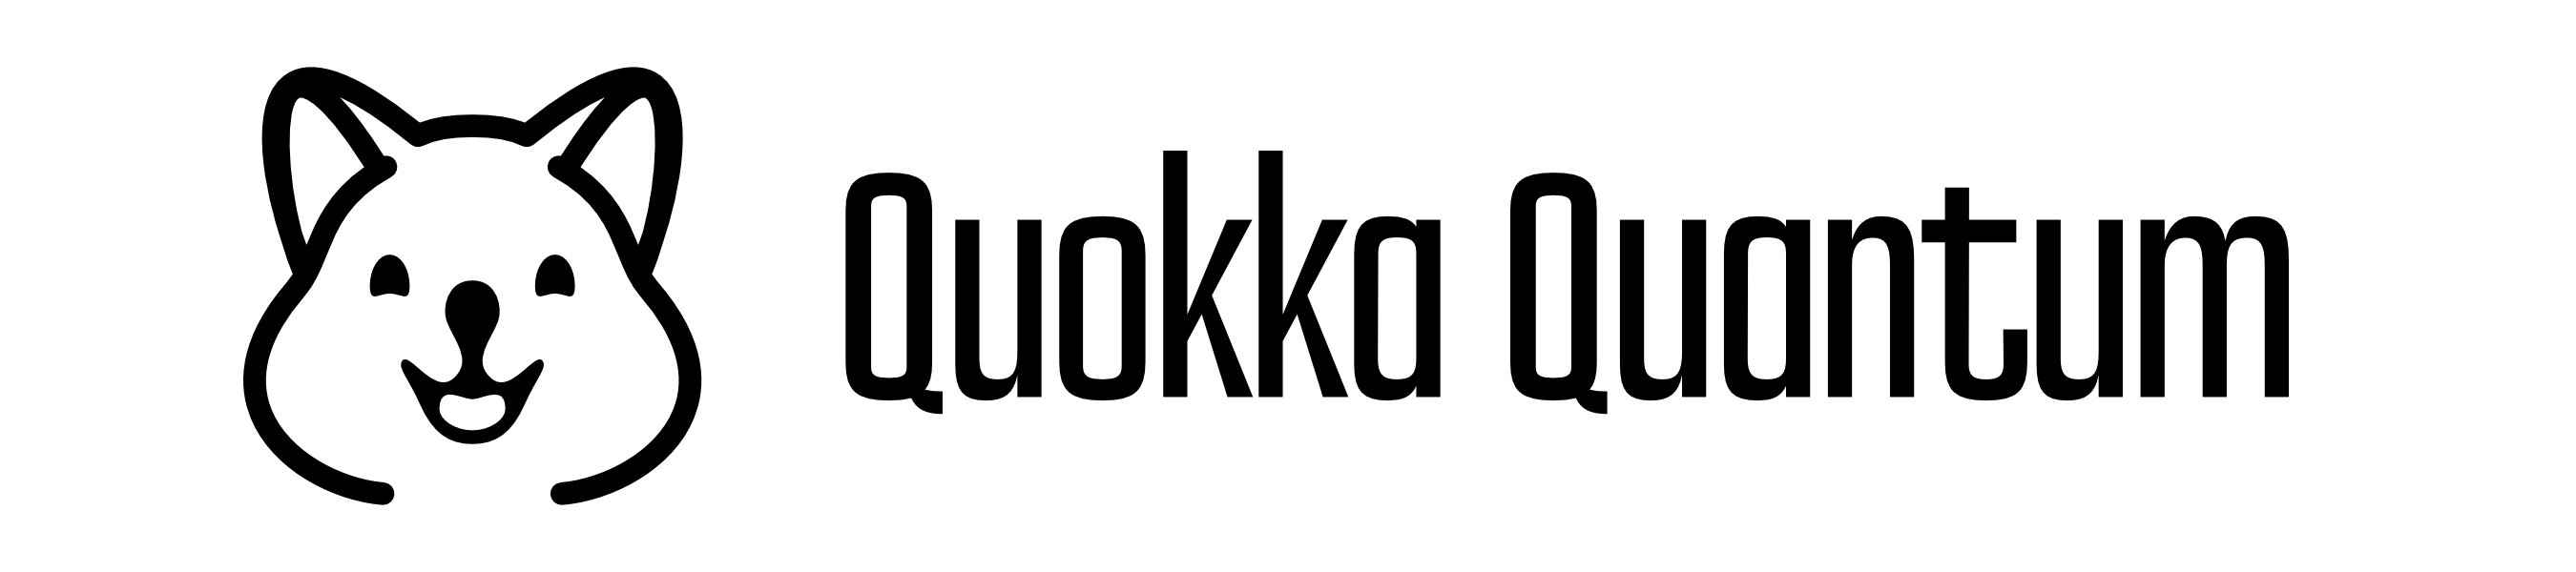

In [4]:
# default Quokka address (change if you have your own!):
my_quokka = 'quokka1'

# the complete addresss
request_http = 'http://{}.quokkacomputing.com/qsim/qasm'.format(my_quokka)

In [5]:
program = """
OPENQASM 2.0;

qreg q[1];

creg c[1];

h q[0];

measure q[0] -> c[0];
"""

In [6]:
# Data handling and communication
import json  # For working with JSON (JavaScript Object Notation) data
import requests  # For making HTTP requests to the Quokka

# Suppressing warnings (optional)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

# create dictionary
data = {
    'script': program,
    'count': 10
}

# send the request
result = requests.post(request_http, json=data, verify=False)

# load the object into a Python dictionary
json_obj = json.loads(result.content)

# print the keys and entries
print(json_obj)

{'error': 'no error', 'error_code': 0, 'result': {'c': [[1], [1], [1], [1], [0], [1], [1], [0], [0], [1]]}}


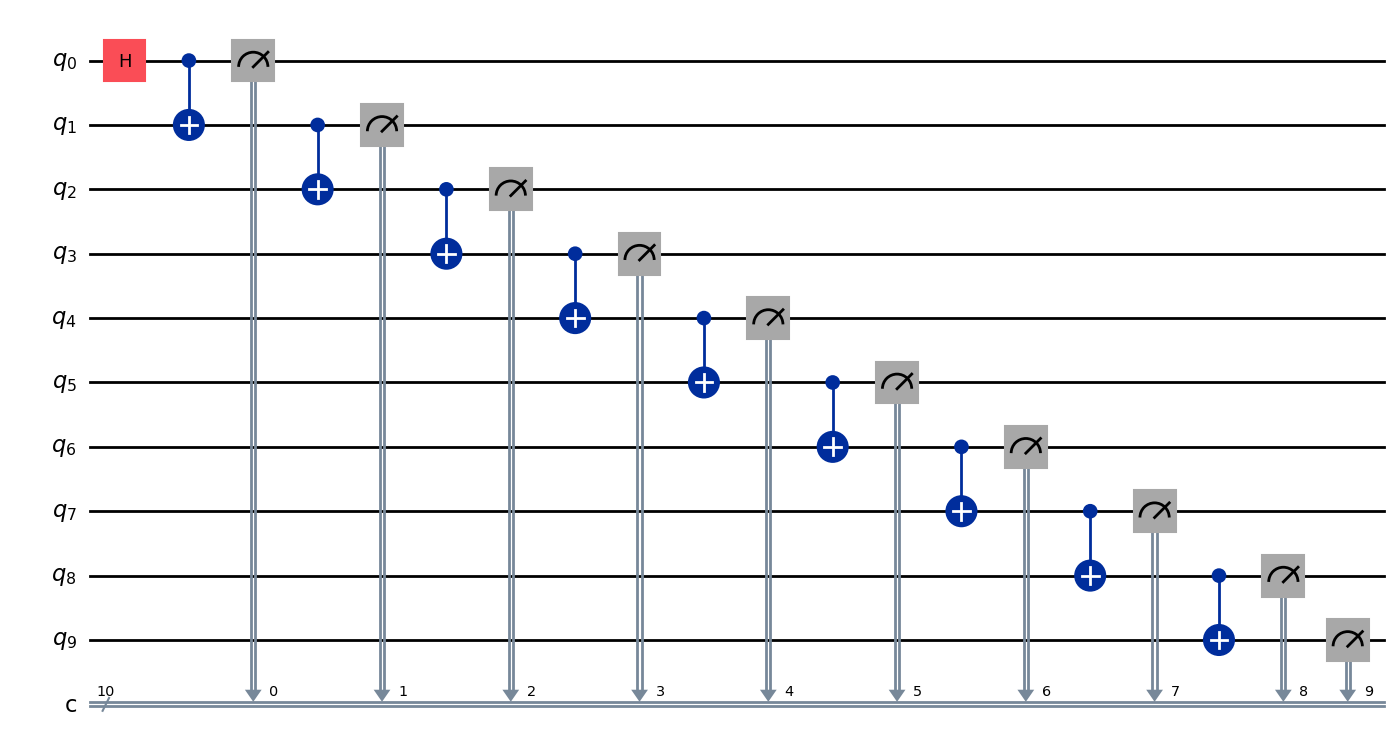

In [20]:
import qiskit

num =10

circuit = qiskit.QuantumCircuit(num,num)
circuit.h(0)

for i in range(num-1):
    circuit.cx(i, i+1)
    circuit.measure(i,i)

circuit.measure(num-1,num-1)

circuit.draw('mpl', fold=-1)

In [21]:
from qiskit.qasm2 import dumps

code = dumps(circuit)

print(code)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[10];
creg c[10];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
cx q[1],q[2];
measure q[1] -> c[1];
cx q[2],q[3];
measure q[2] -> c[2];
cx q[3],q[4];
measure q[3] -> c[3];
cx q[4],q[5];
measure q[4] -> c[4];
cx q[5],q[6];
measure q[5] -> c[5];
cx q[6],q[7];
measure q[6] -> c[6];
cx q[7],q[8];
measure q[7] -> c[7];
cx q[8],q[9];
measure q[8] -> c[8];
measure q[9] -> c[9];


In [24]:
data = {
    'script': code,
    'count': 10,
    'state_vector': False
}

result = requests.post(request_http, json=data, verify=False)
json_obj = json.loads(result.content)

print(json_obj['result']['c'])

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Watch out as some simulators may take shortcuts when simulating large circuits...

In [27]:
import qiskit
from qiskit_aer import AerSimulator

qubits = 500

# Generate GHZ state
circ = qiskit.QuantumCircuit(qubits)
circ.h(0)
for i in range(qubits-1):
    circ.cx(control_qubit=i, target_qubit=i+1)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = aersim.run(circ).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)

Counts(ideal): {'11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111': 514, '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000